# Classification of car sales customers

This Notebook was developed for my mini project 3. The data set used was obtained from Kaggel and may be viewed on link below. 


https://www.kaggle.com/kaushiksuresh147/customer-segmentation

Business Objective - develop  a classification model for car sales customers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

%matplotlib inline



In [2]:
# Import Libraries


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier



In [3]:

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [5]:
df = pd.read_csv('train.csv', index_col = 'ID')
df


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 462809 to 461879
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 693.3+ KB


In [7]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
(df==0).sum()

Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    2318
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation          0
dtype: int64

<AxesSubplot:ylabel='ID'>

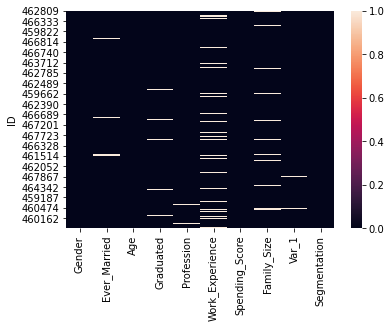

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [11]:

df.rename({'Segmentation':'Classification'}, axis = 'columns' , inplace = True)

In [12]:
# change column header to lower case
c = df.columns
[x.lower() for x in c]





['gender',
 'ever_married',
 'age',
 'graduated',
 'profession',
 'work_experience',
 'spending_score',
 'family_size',
 'var_1',
 'classification']

In [13]:
#assign lower case headers to df
df = df.set_axis(['gender',
 'ever_married',
 'age',
 'graduated',
 'profession',
 'work_experience',
 'spending_score',
 'family_size',
 'var_1',
 'classification'],  axis = 1, inplace=False)

In [14]:
df

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,classification
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D


<function matplotlib.pyplot.show(close=None, block=None)>

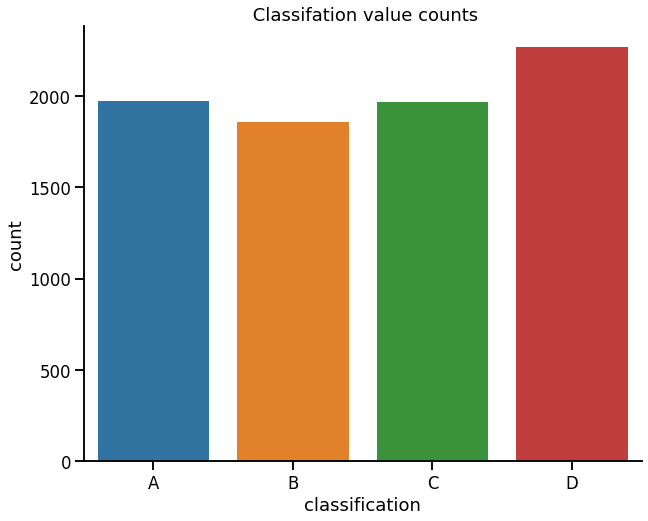

In [15]:
#Check if dataset is balanced
plt.figure(figsize = (10,8))
sns.set_context('talk')
sns.countplot(x = df.classification, data = df, order = ['A', 'B', 'C','D'])
plt.title(' Classifation value counts')
sns.despine(right = True, top = True)
plt.show

In [16]:
#check value counts of ...
df.ever_married.value_counts(), df.graduated.value_counts(), df.profession.value_counts(), df.var_1.value_counts()

(Yes    4643
 No     3285
 Name: ever_married, dtype: int64,
 Yes    4968
 No     3022
 Name: graduated, dtype: int64,
 Artist           2516
 Healthcare       1332
 Entertainment     949
 Engineer          699
 Doctor            688
 Lawyer            623
 Executive         599
 Marketing         292
 Homemaker         246
 Name: profession, dtype: int64,
 Cat_6    5238
 Cat_4    1089
 Cat_3     822
 Cat_2     422
 Cat_7     203
 Cat_1     133
 Cat_5      85
 Name: var_1, dtype: int64)

In [17]:
df[['work_experience', 'family_size']].median()

work_experience    1.0
family_size        3.0
dtype: float64

In [18]:
# impute missing values using simple imputer

mode_imputer = SimpleImputer(strategy = 'most_frequent')
median_imputer = SimpleImputer(strategy = 'median')
constant_inputer = SimpleImputer(strategy = 'constant', fill_value = 0)

df.loc[:, 'ever_married'] = mode_imputer.fit_transform(df.loc[:,'ever_married'].values.reshape(-1,1))

df.loc[:, 'graduated'] = mode_imputer.fit_transform(df.loc[:,'graduated'].values.reshape(-1,1))

df.loc[:, 'profession'] = mode_imputer.fit_transform(df.loc[:,'profession'].values.reshape(-1,1))

df.loc[:, 'var_1'] = mode_imputer.fit_transform(df.loc[:,'var_1'].values.reshape(-1,1))

df.loc[:, 'family_size'] = median_imputer.fit_transform(df.loc[:,'family_size'].values.reshape(-1,1))

#df.loc[:, 'work_experience'] = median_imputer.fit_transform(df.loc[:,'work_experience'].values.reshape(-1,1))

df['work_experience'].fillna(value = 0, inplace = True )

In [19]:
# check that all missing values have been imputed
df.isnull().sum()

gender             0
ever_married       0
age                0
graduated          0
profession         0
work_experience    0
spending_score     0
family_size        0
var_1              0
classification     0
dtype: int64

In [20]:
#check for zeros in df
(df==0).sum()

gender                0
ever_married          0
age                   0
graduated             0
profession            0
work_experience    3147
spending_score        0
family_size           0
var_1                 0
classification        0
dtype: int64

In [21]:
df.dtypes

gender              object
ever_married        object
age                  int64
graduated           object
profession          object
work_experience    float64
spending_score      object
family_size        float64
var_1               object
classification      object
dtype: object

In [22]:
df['work_experience'].value_counts(dropna = False)

0.0     3147
1.0     2354
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: work_experience, dtype: int64

In [23]:
df.age.max()

89

In [24]:
#impute work_experience. Startify based on age btween 20 - 89yrs at 1 year exp for every 5 years.

df.loc[((df['age'] >=20) & (df['age'] <25) & (df['work_experience'] == 0)),'work_experience'] = 1

df.loc[((df['age'] >=25) & (df['age'] <30) & (df['work_experience'] == 0)),'work_experience'] = 2

df.loc[((df['age'] >=30) & (df['age'] <35) & (df['work_experience'] == 0)),'work_experience'] = 3

df.loc[((df['age'] >=35) & (df['age'] <40) & (df['work_experience'] == 0)),'work_experience'] = 4

df.loc[((df['age'] >=40) & (df['age'] <45) & (df['work_experience'] == 0)),'work_experience'] = 5

df.loc[((df['age'] >=45) & (df['age'] <50) & (df['work_experience'] == 0)),'work_experience'] = 6

df.loc[((df['age'] >=50) & (df['age'] <55) & (df['work_experience'] == 0)),'work_experience'] = 7

df.loc[((df['age'] >=55) & (df['age'] <60) & (df['work_experience'] == 0)),'work_experience'] = 8

df.loc[((df['age'] >=60) & (df['age'] <65) & (df['work_experience'] == 0)),'work_experience'] = 9

df.loc[((df['age'] >=65) & (df['age'] <70) & (df['work_experience'] == 0)),'work_experience'] = 10

df.loc[((df['age'] >=70) & (df['age'] <75) & (df['work_experience'] == 0)),'work_experience'] = 11

df.loc[((df['age'] >=75) & (df['age'] <80) & (df['work_experience'] == 0)),'work_experience'] = 12

df.loc[((df['age'] >=80) & (df['age'] <85) & (df['work_experience'] == 0)),'work_experience'] = 13

df.loc[((df['age'] >=85) & (df['work_experience'] == 0)),'work_experience'] = 14


In [25]:
# check all value have been inputed
df.work_experience.value_counts(dropna = False)

1.0     2571
8.0      684
2.0      657
4.0      636
9.0      614
3.0      592
6.0      503
5.0      487
7.0      437
10.0     221
11.0     163
13.0     136
14.0     129
12.0     121
0.0      117
Name: work_experience, dtype: int64

In [26]:
# change dtypes
df.work_experience = df['work_experience'].astype('int64')
df.family_size = df.family_size.astype('int64')

In [27]:
(df==0).sum()

gender               0
ever_married         0
age                  0
graduated            0
profession           0
work_experience    117
spending_score       0
family_size          0
var_1                0
classification       0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 462809 to 461879
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           8068 non-null   object
 1   ever_married     8068 non-null   object
 2   age              8068 non-null   int64 
 3   graduated        8068 non-null   object
 4   profession       8068 non-null   object
 5   work_experience  8068 non-null   int64 
 6   spending_score   8068 non-null   object
 7   family_size      8068 non-null   int64 
 8   var_1            8068 non-null   object
 9   classification   8068 non-null   object
dtypes: int64(3), object(7)
memory usage: 951.4+ KB


(array([0, 1, 2]),
 [Text(0, 0, 'age'), Text(1, 0, 'work_experience'), Text(2, 0, 'family_size')])

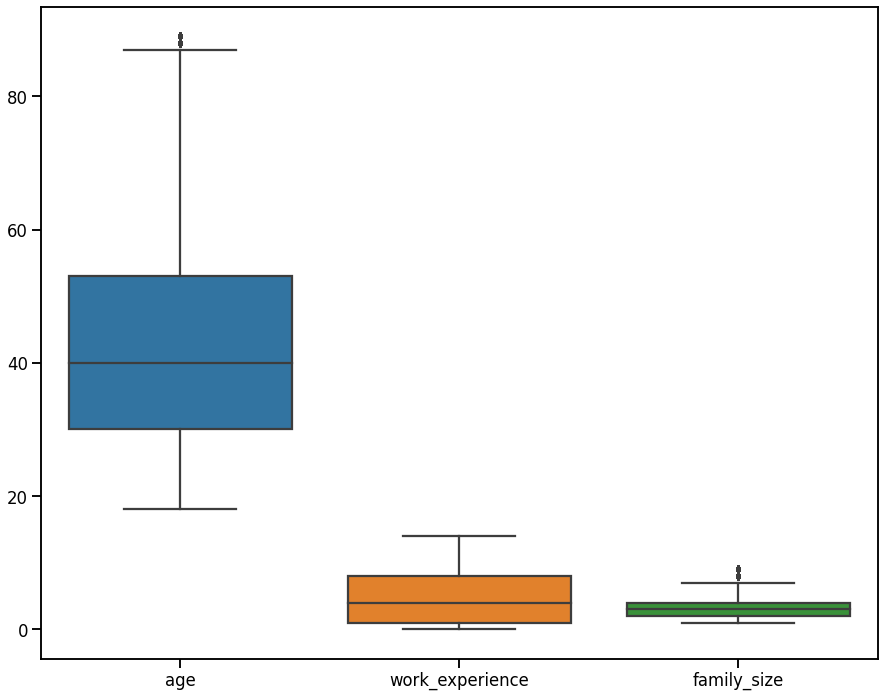

In [29]:
# Check for outliers


plt.figure(figsize = (15,12))
sns.boxplot(data = df)
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'age dist for data set')

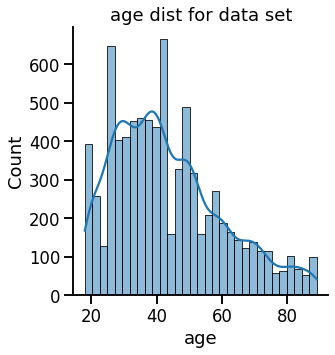

In [30]:
sns.displot(df.age, kde = True)
sns.set_context('talk')
plt.title('age dist for data set')

Text(0.5, 1.0, 'work experience dist for data set')

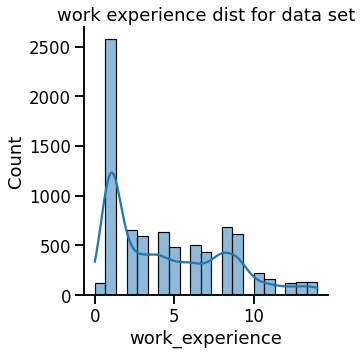

In [31]:
sns.displot(df.work_experience, kde = True)
sns.set_context('talk')
plt.title('work experience dist for data set')

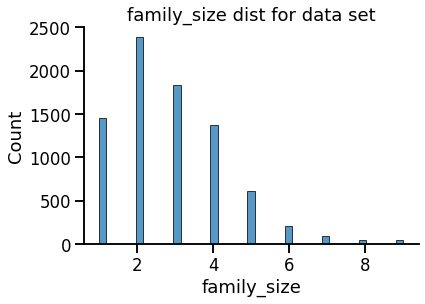

In [32]:
sns.histplot(df.family_size)
sns.set_context('talk')
plt.title('family_size dist for data set')
sns.despine(right = True, top = True)

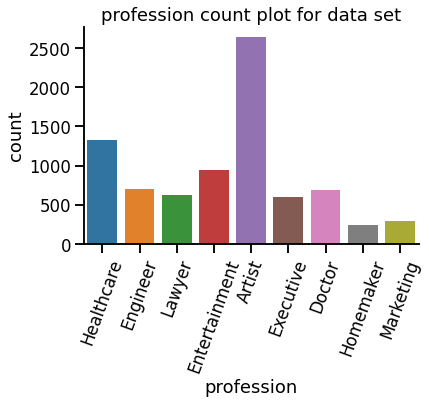

In [33]:
sns.set_context('talk')
sns.countplot(x = df.profession, data = df)
plt.xticks( rotation = 70)
plt.title('profession count plot for data set')
sns.despine(right = True, top = True)

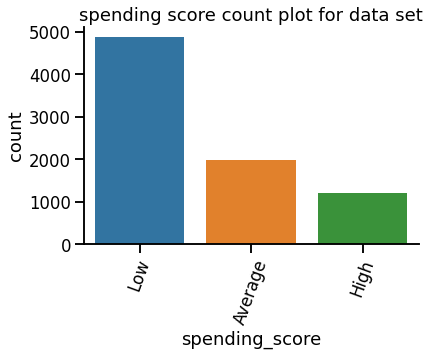

In [34]:
sns.countplot(x = df.spending_score, data = df)
plt.xticks( rotation = 70)
plt.title('spending score count plot for data set')
sns.despine(right = True, top = True)

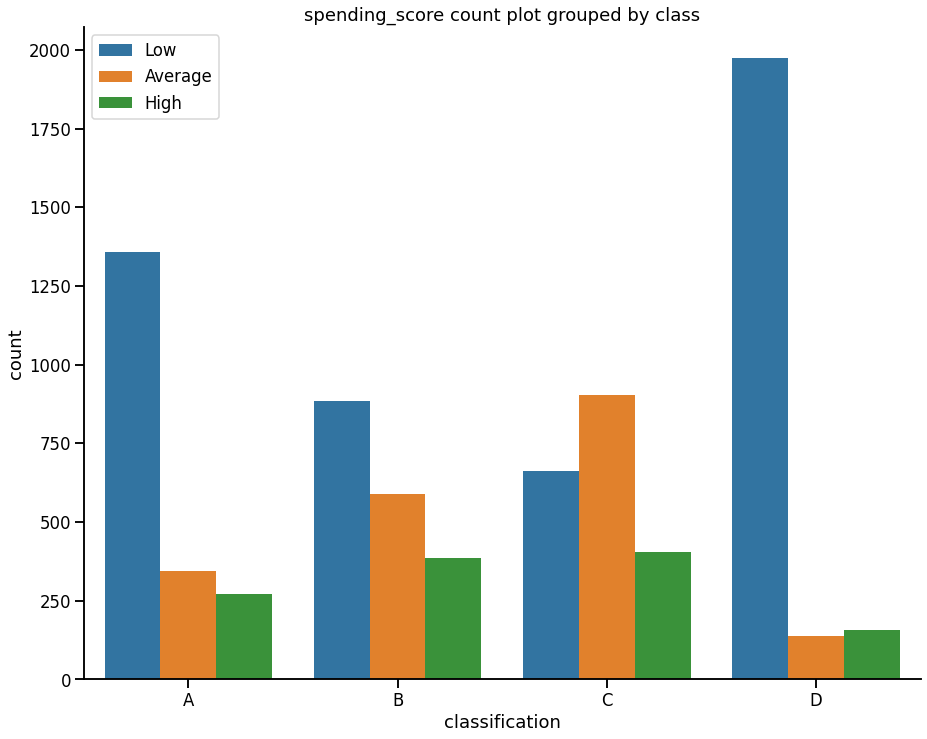

In [35]:
plt.figure(figsize = (15, 12))
sns.countplot(x = df.classification, data = df ,hue = df.spending_score,  order = ['A', 'B', 'C', 'D'])
plt.title('spending_score count plot grouped by class')
sns.despine(right = True, top = True)
plt.legend().set_visible(True)

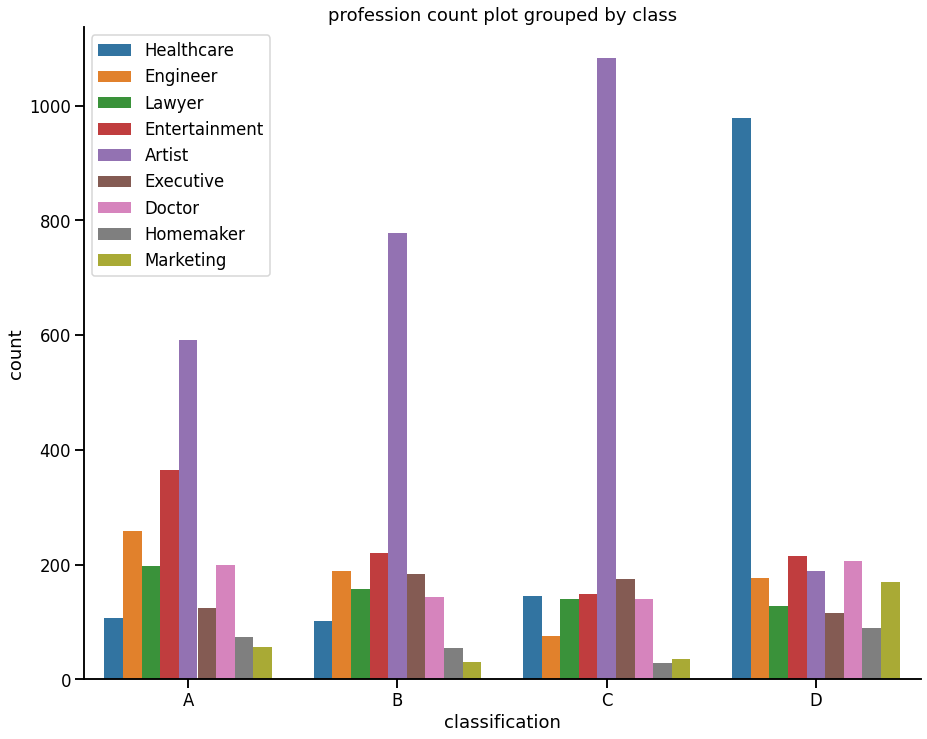

In [36]:
plt.figure(figsize = (15, 12))
sns.countplot(x = df.classification, data = df,hue = df.profession,  order = ['A', 'B', 'C', 'D'])
plt.title('profession count plot grouped by class')
sns.despine(right = True, top = True)
plt.legend().set_visible(True)

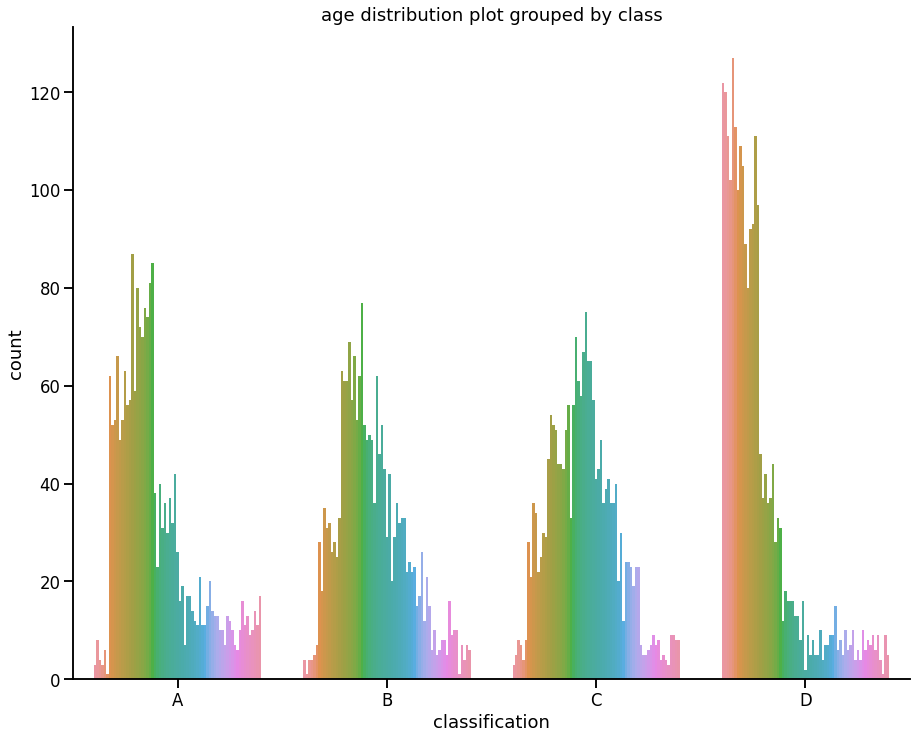

In [37]:

plt.figure(figsize = (15, 12))
plt.title('age distribution plot grouped by class')
sns.set_context('talk')
sns.countplot(x = 'classification', data = df, hue = 'age', order = ['A', 'B', 'C', 'D'])
sns.despine(right = True, top = True)
plt.legend().set_visible(False)


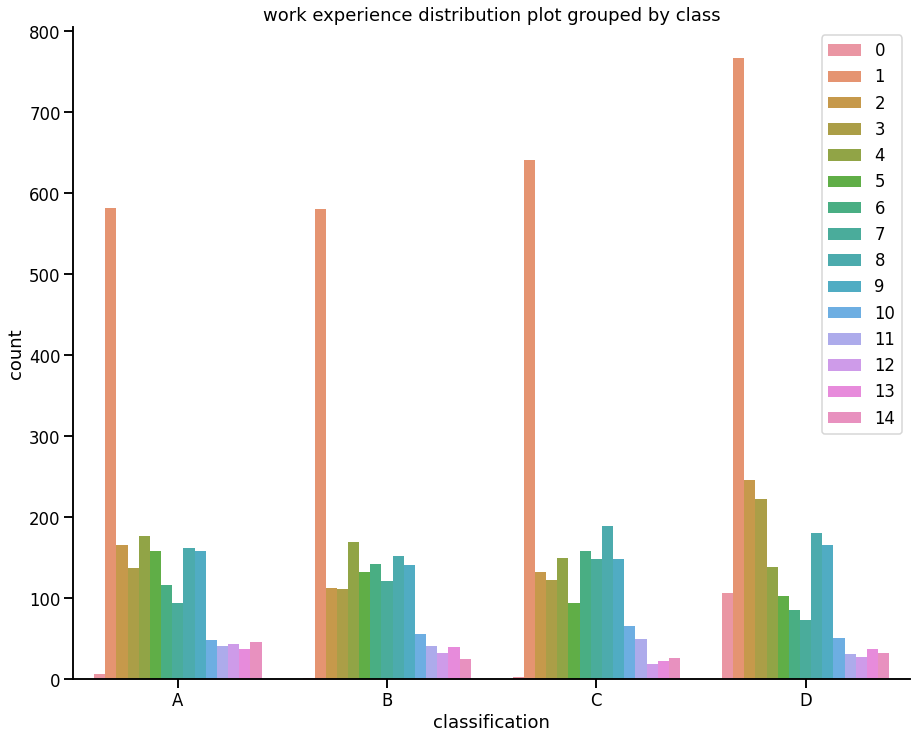

In [38]:

plt.figure(figsize = (15, 12))
plt.title('work experience distribution plot grouped by class')
sns.set_context('talk')
sns.countplot(x = 'classification', data = df, hue = 'work_experience', order = ['A', 'B', 'C', 'D'])
sns.despine(right = True, top = True)
plt.legend().set_visible(True)

<Figure size 1080x864 with 0 Axes>

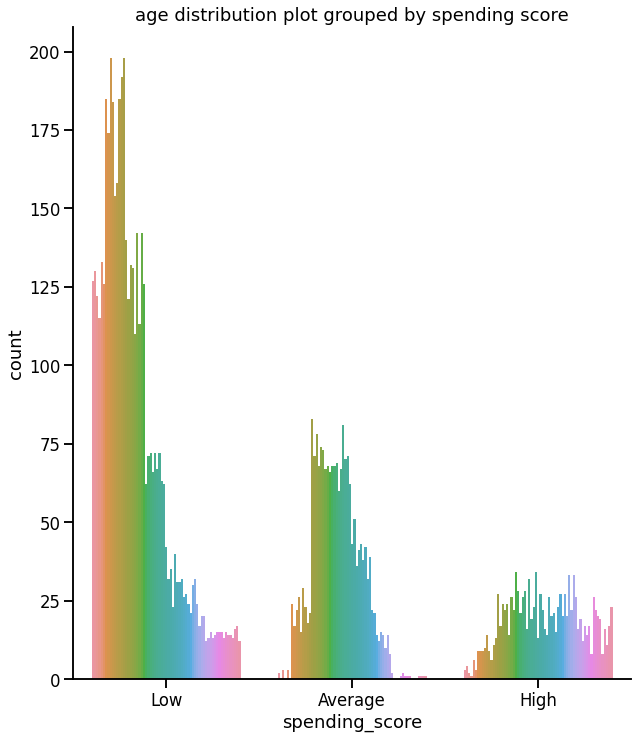

In [39]:

plt.figure(figsize = (15, 12))
sns.set_context('talk')
plt.figure(figsize = (10, 12))
sns.countplot(x = 'spending_score', data = df, hue = 'age', order = ['Low', 'Average', 'High'])
plt.title('age distribution plot grouped by spending score')
sns.despine(right = True, top = True)
plt.legend().set_visible(False)

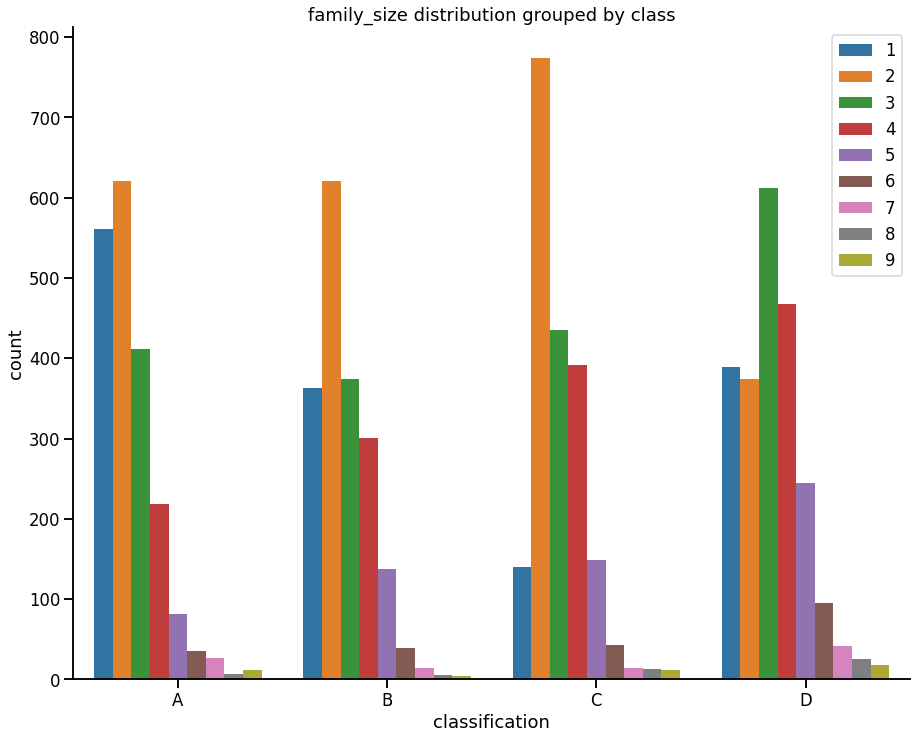

In [40]:

plt.figure(figsize = (15, 12))
sns.set_context('talk')
sns.countplot(x = 'classification', data = df, hue = 'family_size', order = ['A', 'B', 'C', 'D'])
plt.title('family_size distribution grouped by class')
sns.despine(right = True, top = True)
plt.legend().set_visible(True)

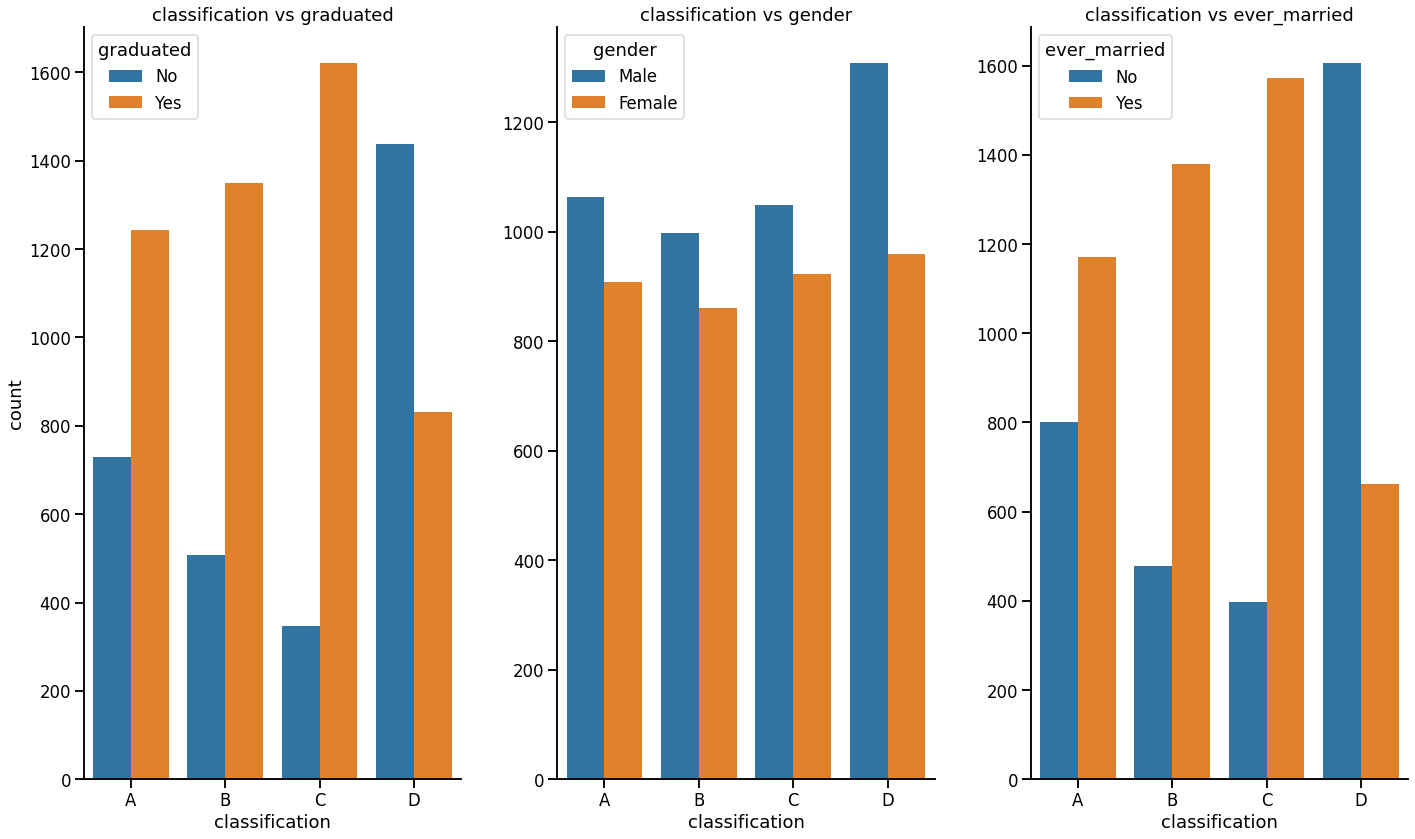

In [41]:
import matplotlib.gridspec as gridspec

# Setting up the plot surface
#fig = plt.figure(figsize=(10, 5))
#3gs = gridspec.GridSpec(1,3)#nrows,ncols



fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 12))
sns.set_context('talk')
sns.countplot(x = 'classification', data = df, hue =df.graduated, order = ['A', 'B', 'C', 'D'], ax = ax1)
sns.countplot(x = 'classification', data = df, hue = 'gender', order = ['A', 'B', 'C', 'D'],  ax = ax2)
sns.countplot(x = 'classification', data = df, hue = 'ever_married', order = ['A', 'B', 'C', 'D'],  ax = ax3)



sns.despine(right = True, top = True)

ax2.set_ylabel(" ")  # remove y label, but keep ticks
ax3.set_ylabel("")  # remove y label, but keep ticks

ax1.set_title('classification vs graduated')
ax2.set_title('classification vs gender')
ax3.set_title('classification vs ever_married')


plt.tight_layout()
plt.show()

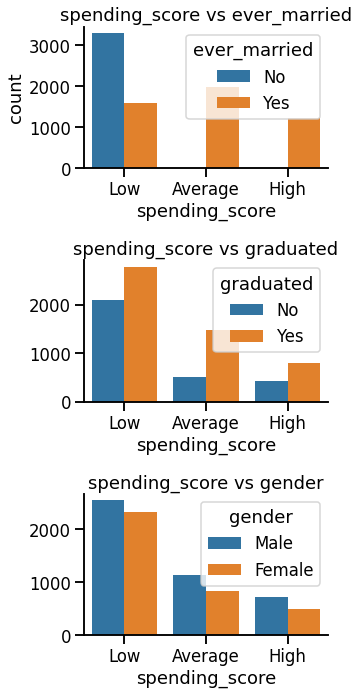

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(5, 10))
sns.set_context('talk')

sns.countplot(x = 'spending_score', data = df, hue = 'ever_married', ax = ax1)
sns.countplot(x = 'spending_score', data = df, hue = 'graduated', ax = ax2)
sns.countplot(x = 'spending_score', data = df, hue = 'gender', ax = ax3)


sns.despine(right = True, top = True)

ax2.set_ylabel(" ")  # remove y label, but keep ticks
ax3.set_ylabel("")  # remove y label, but keep ticks


ax1.set_title('spending_score vs ever_married')
ax2.set_title('spending_score vs graduated')
ax3.set_title('spending_score vs gender')


plt.tight_layout()
plt.show()

## Preporcessing

In [43]:
# one hot encoding 

In [44]:
df.classification.value_counts(dropna = False)

D    2268
A    1972
C    1970
B    1858
Name: classification, dtype: int64

In [45]:
df.columns

Index(['gender', 'ever_married', 'age', 'graduated', 'profession',
       'work_experience', 'spending_score', 'family_size', 'var_1',
       'classification'],
      dtype='object')

In [46]:
X = df[ ['gender', 'ever_married', 'age', 'graduated', 'profession',
       'work_experience', 'spending_score', 'family_size', 'var_1']]
y = df.classification

In [47]:
X.shape


(8068, 9)

In [48]:
y.shape

(8068,)

In [49]:
# lable encode and then one hot encode y 

import pandas as pd

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_le= le.fit_transform(y)

y_encoded= pd.get_dummies(y_le)

tru=[]

for i in range(0, len(y)): 
  tru.append(np.argmax(y_encoded.iloc[i]))

tru= le.inverse_transform(tru)

#Identical check!
(tru==y ).value_counts()

True    8068
Name: classification, dtype: int64

In [50]:
y_encoded

,0,1,2,3
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
8063,0,0,0,1
8064,0,0,0,1
8065,0,0,0,1
8066,0,1,0,0


In [51]:
# Onehot encode X
# one hot encode categorical columns

X_encoded = pd.get_dummies(X, columns = ['gender', 'ever_married', 'graduated', 'profession', 'spending_score', 'var_1'])
X_encoded

,age,work_experience,family_size,gender_Female,gender_Male,ever_married_No,ever_married_Yes,graduated_No,graduated_Yes,profession_Artist,...,spending_score_Average,spending_score_High,spending_score_Low,var_1_Cat_1,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1,4,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
462643,38,4,3,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
466315,67,1,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
461735,67,10,2,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
462669,40,5,6,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464018,22,1,7,0,1,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
464685,35,3,4,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
465406,33,1,1,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [52]:
X_encoded.index

Int64Index([462809, 462643, 466315, 461735, 462669, 461319, 460156, 464347,
            465015, 465176,
            ...
            460674, 460132, 463613, 465231, 463002, 464018, 464685, 465406,
            467299, 461879],
           dtype='int64', name='ID', length=8068)

In [53]:
#redife X and y


X = X_encoded

y = y_encoded

#  define df_encoded (joined X and y for corr())


y.index = X_encoded.index
#y.columns = ['A','B', 'C','D']
y

,0,1,2,3
ID,,,,
462809,0,0,0,1
462643,1,0,0,0
466315,0,1,0,0
461735,0,1,0,0
462669,1,0,0,0
...,...,...,...,...
464018,0,0,0,1
464685,0,0,0,1
465406,0,0,0,1


In [54]:
df_encoded = pd.concat([X, y], axis = 1 )
df_encoded

,age,work_experience,family_size,gender_Female,gender_Male,ever_married_No,ever_married_Yes,graduated_No,graduated_Yes,profession_Artist,...,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7,0,1,2,3
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1,4,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
462643,38,4,3,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
466315,67,1,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
461735,67,10,2,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
462669,40,5,6,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464018,22,1,7,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
464685,35,3,4,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
465406,33,1,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [55]:
# save encoded file for deeplearning environment
#df_encoded.to_csv('cars_df_encoded.csv')

In [56]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8068.0,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
work_experience,8068.0,4.554289,3.626296,0.0,1.0,4.0,8.0,14.0
family_size,8068.0,2.856346,1.499577,1.0,2.0,3.0,4.0,9.0
gender_Female,8068.0,0.452529,0.497772,0.0,0.0,0.0,1.0,1.0
gender_Male,8068.0,0.547471,0.497772,0.0,0.0,1.0,1.0,1.0
ever_married_No,8068.0,0.407164,0.491336,0.0,0.0,0.0,1.0,1.0
ever_married_Yes,8068.0,0.592836,0.491336,0.0,0.0,1.0,1.0,1.0
graduated_No,8068.0,0.374566,0.484041,0.0,0.0,0.0,1.0,1.0
graduated_Yes,8068.0,0.625434,0.484041,0.0,0.0,1.0,1.0,1.0
profession_Artist,8068.0,0.327219,0.469227,0.0,0.0,0.0,1.0,1.0


In [57]:
df_encoded.columns

Index([                     'age',          'work_experience',
                    'family_size',            'gender_Female',
                    'gender_Male',          'ever_married_No',
               'ever_married_Yes',             'graduated_No',
                  'graduated_Yes',        'profession_Artist',
              'profession_Doctor',      'profession_Engineer',
       'profession_Entertainment',     'profession_Executive',
          'profession_Healthcare',     'profession_Homemaker',
              'profession_Lawyer',     'profession_Marketing',
         'spending_score_Average',      'spending_score_High',
             'spending_score_Low',              'var_1_Cat_1',
                    'var_1_Cat_2',              'var_1_Cat_3',
                    'var_1_Cat_4',              'var_1_Cat_5',
                    'var_1_Cat_6',              'var_1_Cat_7',
                                0,                          1,
                                2,                     

<AxesSubplot:>

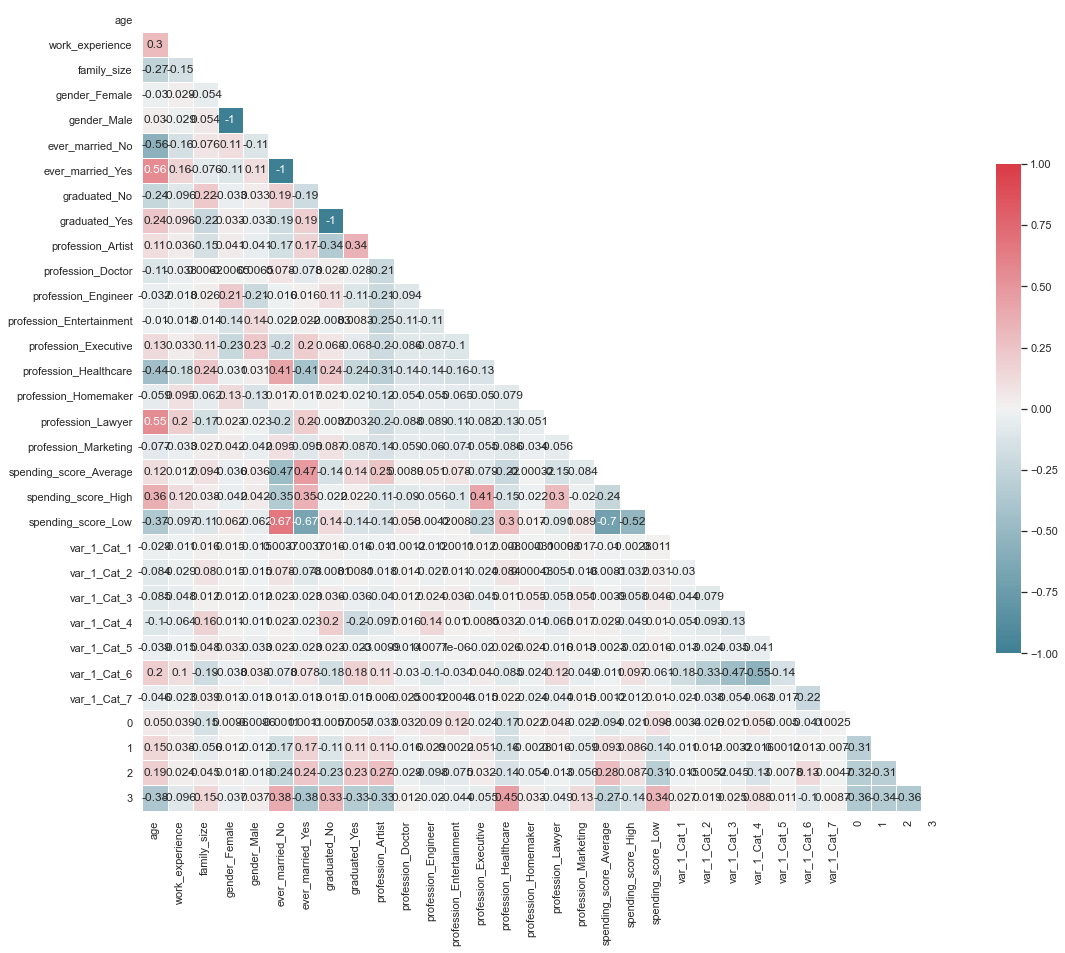

In [58]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_encoded.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_encoded.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [59]:
df_encoded.corr()

,age,work_experience,family_size,gender_Female,gender_Male,ever_married_No,ever_married_Yes,graduated_No,graduated_Yes,profession_Artist,...,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7,0,1,2,3
age,1.000000,0.300994,-0.273373,-0.030216,0.030216,-0.556892,0.556892,-0.235752,0.235752,0.111533,...,-0.084220,-0.084932,-0.103030,-0.038916,0.199443,-0.046497,0.049626,0.154935,0.193101,-0.377079
work_experience,0.300994,1.000000,-0.152837,0.028657,-0.028657,-0.160913,0.160913,-0.096121,0.096121,0.036475,...,-0.028850,-0.047870,-0.064185,-0.014769,0.104062,-0.022812,0.039368,0.037926,0.023715,-0.095817
family_size,-0.273373,-0.152837,1.000000,-0.054059,0.054059,0.075525,-0.075525,0.223572,-0.223572,-0.148646,...,0.080424,0.012319,0.164119,0.047936,-0.191346,0.039142,-0.147859,-0.055580,0.045024,0.150374
gender_Female,-0.030216,0.028657,-0.054059,1.000000,-1.000000,0.111732,-0.111732,-0.033206,0.033206,0.041039,...,0.014577,0.011543,0.011075,0.033011,-0.037674,0.012937,0.009627,0.011949,0.017690,-0.037299
gender_Male,0.030216,-0.028657,0.054059,-1.000000,1.000000,-0.111732,0.111732,0.033206,-0.033206,-0.041039,...,-0.014577,-0.011543,-0.011075,-0.033011,0.037674,-0.012937,-0.009627,-0.011949,-0.017690,0.037299
ever_married_No,-0.556892,-0.160913,0.075525,0.111732,-0.111732,1.000000,-1.000000,0.188450,-0.188450,-0.167710,...,0.078385,0.022777,0.022591,0.023204,-0.078036,0.013444,-0.001132,-0.166287,-0.237315,0.383605
ever_married_Yes,0.556892,0.160913,-0.075525,-0.111732,0.111732,-1.000000,1.000000,-0.188450,0.188450,0.167710,...,-0.078385,-0.022777,-0.022591,-0.023204,0.078036,-0.013444,0.001132,0.166287,0.237315,-0.383605
graduated_No,-0.235752,-0.096121,0.223572,-0.033206,0.033206,0.188450,-0.188450,1.000000,-1.000000,-0.344858,...,-0.008128,0.035646,0.197175,0.022979,-0.175224,0.014656,-0.005747,-0.114315,-0.232416,0.334661
graduated_Yes,0.235752,0.096121,-0.223572,0.033206,-0.033206,-0.188450,0.188450,-1.000000,1.000000,0.344858,...,0.008128,-0.035646,-0.197175,-0.022979,0.175224,-0.014656,0.005747,0.114315,0.232416,-0.334661
profession_Artist,0.111533,0.036475,-0.148646,0.041039,-0.041039,-0.167710,0.167710,-0.344858,0.344858,1.000000,...,-0.017900,-0.040148,-0.096901,-0.009867,0.107057,0.006029,-0.033363,0.106683,0.269567,-0.325628


In [60]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45, stratify = y)

#standard scale X_train amd x_test and 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [61]:
cols = X_train.columns

In [62]:
scaled_X_train.shape

(6454, 28)

In [63]:
y_train

,0,1,2,3
ID,,,,
461233,0,0,0,1
460083,0,1,0,0
466276,0,0,0,1
465992,1,0,0,0
462933,0,1,0,0
...,...,...,...,...
464489,0,0,1,0
465799,0,0,1,0
461043,0,0,0,1


# Feature selection

In [64]:
X.columns

Index(['age', 'work_experience', 'family_size', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'graduated_No', 'graduated_Yes',
       'profession_Artist', 'profession_Doctor', 'profession_Engineer',
       'profession_Entertainment', 'profession_Executive',
       'profession_Healthcare', 'profession_Homemaker', 'profession_Lawyer',
       'profession_Marketing', 'spending_score_Average', 'spending_score_High',
       'spending_score_Low', 'var_1_Cat_1', 'var_1_Cat_2', 'var_1_Cat_3',
       'var_1_Cat_4', 'var_1_Cat_5', 'var_1_Cat_6', 'var_1_Cat_7'],
      dtype='object')

In [65]:
rf_fs = RandomForestClassifier()

rf_fs.fit(X_train, y_train)


RandomForestClassifier()

In [66]:
features = X.columns
feature_score = pd.DataFrame(columns=['Feature','Score'])
feature_score['Feature'] = pd.Series(X.columns)

In [67]:
importance = rf_fs.feature_importances_
for i in range(len(importance)):
    feature_score.iloc[i,1] = importance[i]
    
    
feature_score

,Feature,Score
0,age,0.339434
1,work_experience,0.167925
2,family_size,0.118751
3,gender_Female,0.018013
4,gender_Male,0.018649
5,ever_married_No,0.01664
6,ever_married_Yes,0.019355
7,graduated_No,0.018777
8,graduated_Yes,0.01873
9,profession_Artist,0.032211


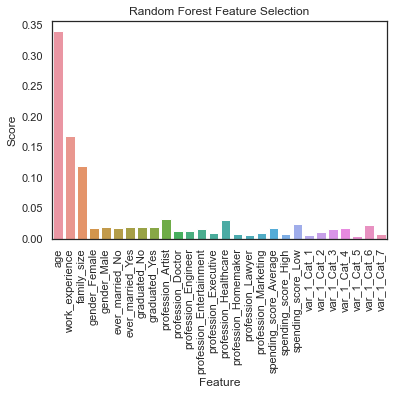

In [68]:
feature_bar = sns.barplot(x = feature_score.Feature, y= feature_score['Score'])
feature_bar.set_title('Random Forest Feature Selection')
plt.xticks(rotation = 90)
plt.show()
#feature_bar.figure.savefig('f_importance.png', transparent=True)

In [69]:
feature_score.loc[:,'Score'].cumsum()

0     0.339434
1     0.507359
2      0.62611
3     0.644124
4     0.662773
5     0.679413
6     0.698769
7     0.717546
8     0.736276
9     0.768486
10    0.781078
11    0.793081
12    0.808246
13    0.816878
14    0.847003
15    0.854359
16    0.860686
17    0.869487
18    0.887063
19    0.894529
20     0.91807
21    0.923647
22    0.934309
23     0.94952
24    0.967357
25    0.971039
26    0.992806
27         1.0
Name: Score, dtype: object

## Decision Tree

In [70]:
# instantiate Decision Tree and fit
dt = DecisionTreeClassifier()
dt.fit(scaled_X_train, y_train)



DecisionTreeClassifier()

In [71]:
y_train_pred = dt.predict(scaled_X_train)
y_train_pred

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [72]:
pd.DataFrame(y_train).head(100)

,0,1,2,3
ID,,,,
461233,0,0,0,1
460083,0,1,0,0
466276,0,0,0,1
465992,1,0,0,0
462933,0,1,0,0
...,...,...,...,...
463531,1,0,0,0
462649,0,0,0,1
463194,0,1,0,0


In [73]:
y_train.shape, y_train_pred.shape

((6454, 4), (6454, 4))

In [74]:


print(classification_report(y_train, y_train_pred, zero_division = 1,target_names = ['A','B','C','D'] ))
print('roc_auc_score on training', roc_auc_score(y_train,y_train_pred, multi_class ='ovr'))


scores = cross_val_score(dt, scaled_X_train, y_train, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           A       1.00      0.92      0.96      1578
           B       0.99      0.90      0.94      1486
           C       0.98      0.91      0.94      1576
           D       1.00      0.96      0.98      1814

   micro avg       0.99      0.92      0.96      6454
   macro avg       0.99      0.92      0.96      6454
weighted avg       0.99      0.92      0.96      6454
 samples avg       0.99      0.92      0.92      6454

roc_auc_score on training 0.9598116184351809
0.4250 accuracy with a standard deviation of 0.01


In [75]:
# Score dt on test data

y_test_pred = dt.predict(scaled_X_test)
y_test_pred

print(classification_report(y_test,y_test_pred, zero_division = 1, target_names = ['A','B','C','D'] ))
print ('roc_auc score on test data',roc_auc_score(y_test,y_test_pred, multi_class ='ovr'))

scores = cross_val_score(dt, scaled_X_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           A       0.35      0.35      0.35       394
           B       0.29      0.27      0.28       372
           C       0.45      0.41      0.43       394
           D       0.57      0.56      0.56       454

   micro avg       0.42      0.40      0.41      1614
   macro avg       0.42      0.40      0.41      1614
weighted avg       0.42      0.40      0.41      1614
 samples avg       0.45      0.40      0.40      1614

roc_auc score on test data 0.6068335727766248
0.4120 accuracy with a standard deviation of 0.02


In [76]:
 accuracy_score(y_test, y_test_pred)

0.4033457249070632

# # Random Forrest

In [77]:
#Instantiate Random Forrest and fit

rf = RandomForestClassifier(n_estimators = 150, random_state = 45, verbose = 1, bootstrap  = False, criterion = 'gini')

rf.fit(scaled_X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.0s finished


RandomForestClassifier(bootstrap=False, n_estimators=150, random_state=45,
                       verbose=1)

In [78]:
# Evaluate model against training set

y_train_predict = rf.predict(scaled_X_train)

print(classification_report(y_train, y_train_predict, zero_division = 1))

print('roc_auc_score on training', roc_auc_score(y_train,y_train_pred, multi_class ='ovr'))

scores = cross_val_score(rf, scaled_X_train, y_train, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1578
           1       0.99      0.90      0.94      1486
           2       0.98      0.91      0.94      1576
           3       1.00      0.96      0.98      1814

   micro avg       0.99      0.92      0.96      6454
   macro avg       0.99      0.92      0.96      6454
weighted avg       0.99      0.92      0.96      6454
 samples avg       0.99      0.92      0.92      6454

roc_auc_score on training 0.9598116184351809


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Us

0.4019 accuracy with a standard deviation of 0.02


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


In [79]:
# Score rf on test data

y_test_pred = rf.predict(scaled_X_test)
y_test_pred

print(classification_report(y_test,y_test_pred, zero_division = 1, target_names = ['A','B','C','D'] ))
print ('roc_auc score on test data',roc_auc_score(y_test,y_test_pred, multi_class ='ovr'))

scores = cross_val_score(rf, scaled_X_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           A       0.42      0.33      0.37       394
           B       0.34      0.25      0.29       372
           C       0.50      0.43      0.46       394
           D       0.64      0.57      0.61       454

   micro avg       0.49      0.40      0.44      1614
   macro avg       0.48      0.40      0.43      1614
weighted avg       0.48      0.40      0.44      1614
 samples avg       0.58      0.40      0.40      1614

roc_auc score on test data 0.6284110178498774


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.3569 accuracy with a standard deviation of 0.01


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


## GridSearch Random forest

In [80]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators':[25, 50, 75, 100, 120, 150],
    'bootstrap': [True, False],
    'criterion':['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_samples':[500,1000,2500,5000]
}
# Create a based model
rf3 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf3, param_grid = param_grid,cv = 5, verbose = 2)

In [81]:
#grid_search.fit(scaled_X_train, y_train)

In [82]:
#best_rf3 = grid_search.best_estimator_
#best_rf3

In [83]:
# save model

import os
import joblib


#joblib.dump(best_rf3, "./best_rf3.joblib")


# load, no need to initialize the loaded_rf
best_rf3 = joblib.load("./best_rf3.joblib")

In [84]:
# Evaluate model against training set

y_train_predict = best_rf3.predict(scaled_X_train)

print(classification_report(y_train, y_train_predict, zero_division = 1))

scores = cross_val_score(best_rf3, scaled_X_train, y_train, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print('roc_auc_score on training', roc_auc_score(y_train,y_train_pred, multi_class ='ovr'))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1578
           1       0.99      0.90      0.94      1486
           2       0.98      0.91      0.94      1576
           3       1.00      0.96      0.98      1814

   micro avg       0.99      0.92      0.96      6454
   macro avg       0.99      0.92      0.96      6454
weighted avg       0.99      0.92      0.96      6454
 samples avg       0.99      0.92      0.92      6454

0.4041 accuracy with a standard deviation of 0.01
roc_auc_score on training 0.9598116184351809


In [85]:
# evaluate model on test data

y_test_pred = best_rf3.predict(scaled_X_test)

print(classification_report(y_test, y_test_pred, zero_division = 1))

print ('roc_auc score on validation data',roc_auc_score(y_test,y_test_pred, multi_class ='ovr'))

#scores = cross_val_score(best_rf3, scaled_X_test, y_test, cv=5)
#print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



              precision    recall  f1-score   support

           0       0.42      0.33      0.37       394
           1       0.34      0.26      0.29       372
           2       0.49      0.42      0.45       394
           3       0.65      0.57      0.61       454

   micro avg       0.49      0.40      0.44      1614
   macro avg       0.47      0.40      0.43      1614
weighted avg       0.48      0.40      0.44      1614
 samples avg       0.58      0.40      0.40      1614

roc_auc score on validation data 0.6276270971975164


## Random forest on 5 best features

In [86]:
  
feature_score.sort_values( by = "Score", ascending = False)

,Feature,Score
0,age,0.339434
1,work_experience,0.167925
2,family_size,0.118751
9,profession_Artist,0.032211
14,profession_Healthcare,0.030125
20,spending_score_Low,0.023541
26,var_1_Cat_6,0.021767
6,ever_married_Yes,0.019355
7,graduated_No,0.018777
8,graduated_Yes,0.01873


In [87]:
df_encoded.columns

Index([                     'age',          'work_experience',
                    'family_size',            'gender_Female',
                    'gender_Male',          'ever_married_No',
               'ever_married_Yes',             'graduated_No',
                  'graduated_Yes',        'profession_Artist',
              'profession_Doctor',      'profession_Engineer',
       'profession_Entertainment',     'profession_Executive',
          'profession_Healthcare',     'profession_Homemaker',
              'profession_Lawyer',     'profession_Marketing',
         'spending_score_Average',      'spending_score_High',
             'spending_score_Low',              'var_1_Cat_1',
                    'var_1_Cat_2',              'var_1_Cat_3',
                    'var_1_Cat_4',              'var_1_Cat_5',
                    'var_1_Cat_6',              'var_1_Cat_7',
                                0,                          1,
                                2,                     

In [88]:
scaled_X_main_train = scaled_X_train[:,[0,1,2,9,14,20]]
scaled_X_main_train.shape,scaled_X_train.shape

((6454, 6), (6454, 28))

In [89]:
scaled_X_main_test= scaled_X_test[:,[0,1,2,9,14,20]]
scaled_X_main_test.shape, scaled_X_test.shape

((1614, 6), (1614, 28))

In [90]:
#Instantiate Random Forrest and fit

rf2 = RandomForestClassifier(n_estimators = 25, random_state = 45, verbose = 1)

rf2.fit(scaled_X_main_train ,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


RandomForestClassifier(n_estimators=25, random_state=45, verbose=1)

In [91]:
# Evaluate model against training set

y_train_predict = rf2.predict(scaled_X_main_train)

print(classification_report(y_train, y_train_predict, zero_division = 1))

print('roc_auc_score on training', roc_auc_score(y_train,y_train_pred, multi_class ='ovr'))

scores = cross_val_score(rf2, scaled_X_main_train, y_train, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.80      0.66      0.72      1578
           1       0.79      0.57      0.66      1486
           2       0.81      0.69      0.74      1576
           3       0.87      0.79      0.83      1814

   micro avg       0.82      0.68      0.75      6454
   macro avg       0.82      0.68      0.74      6454
weighted avg       0.82      0.68      0.74      6454
 samples avg       0.85      0.68      0.68      6454

roc_auc_score on training 0.9598116184351809


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

0.3835 accuracy with a standard deviation of 0.02


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [92]:
# evaluate model on test data

y_test_pred = rf2.predict(scaled_X_main_test)

print(classification_report(y_test, y_test_pred, zero_division = 1))


print ('roc_auc score on test data',roc_auc_score(y_test,y_test_pred, multi_class ='ovr'))

scores = cross_val_score(rf2, scaled_X_main_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.33      0.25      0.28       394
           1       0.36      0.25      0.30       372
           2       0.49      0.42      0.45       394
           3       0.59      0.52      0.55       454

   micro avg       0.46      0.37      0.41      1614
   macro avg       0.44      0.36      0.40      1614
weighted avg       0.45      0.37      0.40      1614
 samples avg       0.56      0.37      0.37      1614

roc_auc score on test data 0.6067751339751334


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.3562 accuracy with a standard deviation of 0.02


## KNN 

In [93]:

# train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(scaled_X_train, y_train)




KNeighborsClassifier(n_neighbors=1)

In [94]:
# Evaluate model against training set

y_train_predict = knn.predict(scaled_X_train)


print(classification_report(y_train, y_train_predict, zero_division = 1))

print('roc_auc_score on training', roc_auc_score(y_train,y_train_pred, multi_class ='ovr'))

scores = cross_val_score(knn, scaled_X_train, y_train, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1578
           1       0.95      0.97      0.96      1486
           2       0.97      0.95      0.96      1576
           3       0.98      0.98      0.98      1814

   micro avg       0.97      0.97      0.97      6454
   macro avg       0.97      0.97      0.97      6454
weighted avg       0.97      0.97      0.97      6454
 samples avg       0.97      0.97      0.97      6454

roc_auc_score on training 0.9598116184351809
0.4391 accuracy with a standard deviation of 0.01


In [95]:
# Score knn on test data

y_test_pred = knn.predict(scaled_X_test)
y_test_pred

print(classification_report(y_test,y_test_pred, zero_division = 1, target_names = ['A','B','C','D'] ))
print ('roc_auc score on test data',roc_auc_score(y_test,y_test_pred, multi_class ='ovr'))

scores = cross_val_score(knn, scaled_X_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           A       0.40      0.37      0.38       394
           B       0.31      0.32      0.32       372
           C       0.43      0.44      0.43       394
           D       0.58      0.59      0.58       454

   micro avg       0.44      0.44      0.44      1614
   macro avg       0.43      0.43      0.43      1614
weighted avg       0.44      0.44      0.44      1614
 samples avg       0.44      0.44      0.44      1614

roc_auc score on test data 0.6206761787668833
0.4108 accuracy with a standard deviation of 0.02


In [96]:
accuracy_score = []
    
for i in np.arange(1,200,5):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaled_X_train, y_train)
    y_predicted = knn.predict(scaled_X_test )
    a = metrics.accuracy_score(y_test, y_predicted)
    accuracy_score.append(a)
accuracy_score = np.array(accuracy_score)
accuracy_score

array([0.4361834 , 0.30545229, 0.35811648, 0.30669145, 0.32589839,
       0.29553903, 0.30793061, 0.28252788, 0.29615861, 0.28996283,
       0.29182156, 0.2819083 , 0.2905824 , 0.27447336, 0.27633209,
       0.27137546, 0.27199504, 0.26951673, 0.27385378, 0.2645601 ,
       0.26827757, 0.26579926, 0.26827757, 0.26394052, 0.26394052,
       0.25774473, 0.26084263, 0.25774473, 0.26208178, 0.25960347,
       0.26146221, 0.25464684, 0.25526642, 0.25340768, 0.25340768,
       0.25092937, 0.24969021, 0.24783147, 0.25216853, 0.25092937])

In [97]:
n_neighbors = np.arange(1,200,5)
n_neighbors

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196])

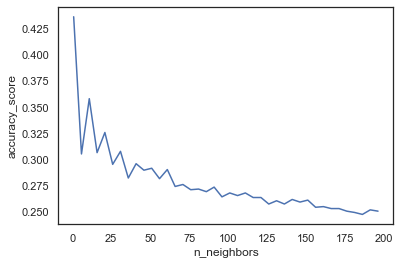

In [98]:
sns.lineplot(x = n_neighbors, y = accuracy_score)
   
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_score')
plt.show()

# Bagging


In [99]:
# train_test split using y_le
# X

X_train, X_test, y_le_train, y_le_test = train_test_split(X, y_le, test_size = 0.2, random_state = 45, stratify = y)


#standard scale X_train amd x_val and 


scaler2 = StandardScaler()
scaled2_X_train = scaler2.fit_transform(X_train)
scaled2_X_test = scaler2.transform(X_test)

In [100]:
y_le_test

array([1, 2, 1, ..., 3, 1, 3])

In [101]:
# Using Decision tree

#kfold = KFold(n_splits = 10, random_state = 45, shuffle = True)

Kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=45, )

dt_bag = DecisionTreeClassifier()
dt_bag.fit(scaled2_X_train, y_le_train)

results = cross_val_score(dt_bag, scaled2_X_train, y_le_train, cv = Kfold)

# cross validation mean
results.mean()

0.4403402372781019

In [102]:
# using Bagging

num_trees = 80

model_bagging = BaggingClassifier(base_estimator = dt, n_estimators = num_trees, bootstrap_features = True, random_state = 45)
model_bagging.fit(scaled2_X_train, y_le_train)


results = cross_val_score(model_bagging, scaled2_X_train, y_le_train, cv = Kfold)

# cross validation mean
results.mean()


0.5069197046423628

In [103]:
# Evaluate model against training set

y_le_train_pred = model_bagging.predict(scaled2_X_train)


print(classification_report(y_le_train, y_le_train_pred, zero_division = 1))


print('roc_auc_score on training', roc_auc_score(y_le_train,model_bagging.predict_proba(scaled2_X_train), multi_class ='ovr'))

scores = cross_val_score(model_bagging, scaled2_X_train, y_le_train, cv= 5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1578
           1       0.95      0.86      0.90      1486
           2       0.88      0.94      0.91      1576
           3       0.93      0.97      0.95      1814

    accuracy                           0.93      6454
   macro avg       0.93      0.92      0.92      6454
weighted avg       0.93      0.93      0.93      6454

roc_auc_score on training 0.9921640276616065
0.5129 accuracy with a standard deviation of 0.02


In [104]:
# evaluate model on test data

y_le_test_pred = model_bagging.predict(scaled2_X_test)

print(classification_report(y_le_test, y_le_test_pred))

print('roc_auc_score on training', roc_auc_score(y_test,model_bagging.predict_proba(scaled2_X_test), multi_class ='ovr'))

scores = cross_val_score(model_bagging, scaled2_X_test, y_le_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       394
           1       0.41      0.31      0.35       372
           2       0.52      0.53      0.52       394
           3       0.60      0.71      0.65       454

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614

roc_auc_score on training 0.7554864023443415
0.4777 accuracy with a standard deviation of 0.03


In [105]:
model_bagging.score(scaled_X_test, y_le_test)

0.5080545229244114

# AdaBoosting _ gridSearch 



In [106]:
# grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


# define the model with default hyperparameters
model = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(scaled2_X_train, y_le_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.511826 using {'learning_rate': 1.0, 'n_estimators': 50}
0.400991 (0.010990) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.400991 (0.010990) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.400991 (0.010990) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.400991 (0.010990) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.400991 (0.010990) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.400991 (0.010990) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.400991 (0.010990) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.472316 (0.016855) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.400991 (0.010990) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.472161 (0.016713) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.474588 (0.016893) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.505007 (0.013536) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.474848 (0.016191) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.505420 

# AdaBoosting 

In [107]:
seed = 45
num_trees = 50
learn_r = 1
#kfold = KFold(n_splits = 10)
kfold = cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_boosting = AdaBoostClassifier(base_estimator = dt , n_estimators = num_trees, random_state = seed, learning_rate = learn_r)
model_boosting.fit(scaled2_X_train, y_le_train)

results = model_selection.cross_val_score(model_boosting, scaled2_X_train, y_le_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())

AdaBoost, Cross-Validation mean: 0.4669


In [108]:
# Evaluate model against training set

y_train_predict = model_boosting.predict(scaled2_X_train)

print(classification_report(y_le_train, y_train_predict, zero_division = 1))

print('roc_auc_score on training', roc_auc_score(y_le_train,model_boosting.predict_proba(scaled2_X_train), multi_class ='ovo'))

scores = cross_val_score(model_boosting, scaled2_X_train, y_le_train, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1578
           1       0.95      0.94      0.94      1486
           2       0.95      0.94      0.94      1576
           3       0.97      0.98      0.98      1814

    accuracy                           0.96      6454
   macro avg       0.95      0.95      0.95      6454
weighted avg       0.96      0.96      0.96      6454

roc_auc_score on training 0.9984109458736912
0.4703 accuracy with a standard deviation of 0.01


In [109]:
# evaluate model on test data

y_le_test_pred = model_boosting.predict(scaled2_X_test)

print(classification_report(y_le_test, y_le_test_pred))

print('roc_auc_score on training', roc_auc_score(y_le_test,model_boosting.predict_proba(scaled2_X_test), multi_class ='ovo'))

scores = cross_val_score(model_boosting, scaled_X_test, y_le_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0       0.36      0.39      0.38       394
           1       0.33      0.30      0.31       372
           2       0.48      0.47      0.48       394
           3       0.60      0.62      0.61       454

    accuracy                           0.45      1614
   macro avg       0.44      0.45      0.44      1614
weighted avg       0.45      0.45      0.45      1614

roc_auc_score on training 0.6991198701602438
0.4461 accuracy with a standard deviation of 0.01


# Stacking _ML Mastery

>knn1 0.438 (0.021)
>knn3 0.458 (0.015)
>knn5 0.472 (0.016)
>knn7 0.482 (0.019)
>knn9 0.487 (0.017)
>soft_voting 0.473 (0.018)


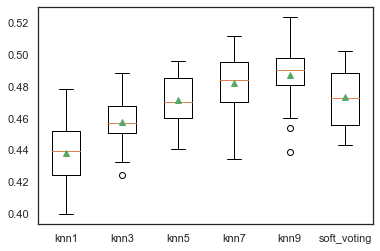

In [110]:
# code adopted from Machine learning Mastery
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot




# get a list of standalone models to evaluate
def get_models():
	models_stacking = dict()
	# define the number of neighbors to consider
	neighbors = [1, 3, 5, 7, 9]
	for n in neighbors:
		key = 'knn' + str(n)
		models_stacking[key] = KNeighborsClassifier(n_neighbors=n)
	# define the voting ensemble
	members = [(n,m) for n,m in models_stacking.items()]
	models_stacking['soft_voting'] = VotingClassifier(estimators=members, voting='soft')
	return models_stacking

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model_stacking, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = scaled2_X_train, y_le_train

# get the models to evaluate
models_stacking = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model_stacking in models_stacking.items():
	# evaluate the model
	scores = evaluate_model(model_stacking, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [111]:
models_stacking

{'knn1': KNeighborsClassifier(n_neighbors=1),
 'knn3': KNeighborsClassifier(n_neighbors=3),
 'knn5': KNeighborsClassifier(),
 'knn7': KNeighborsClassifier(n_neighbors=7),
 'knn9': KNeighborsClassifier(n_neighbors=9),
 'soft_voting': VotingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=1)),
                              ('knn3', KNeighborsClassifier(n_neighbors=3)),
                              ('knn5', KNeighborsClassifier()),
                              ('knn7', KNeighborsClassifier(n_neighbors=7)),
                              ('knn9', KNeighborsClassifier(n_neighbors=9))],
                  voting='soft')}

In [112]:
models_stacking['soft_voting'].fit(scaled2_X_train, y_le_train)

VotingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=1)),
                             ('knn3', KNeighborsClassifier(n_neighbors=3)),
                             ('knn5', KNeighborsClassifier()),
                             ('knn7', KNeighborsClassifier(n_neighbors=7)),
                             ('knn9', KNeighborsClassifier(n_neighbors=9))],
                 voting='soft')

In [113]:
# Evaluate model against training set

y_train_predict = model_stacking.predict(scaled2_X_train)

print(classification_report(y_le_train, y_train_predict, zero_division = 1))

print('roc_auc_score on training', roc_auc_score(y_le_train,model_stacking.predict_proba(scaled2_X_train), multi_class ='ovr'))

scores = cross_val_score(model_stacking, scaled2_X_train, y_le_train, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1578
           1       0.85      0.79      0.82      1486
           2       0.86      0.85      0.86      1576
           3       0.86      0.92      0.89      1814

    accuracy                           0.85      6454
   macro avg       0.85      0.85      0.85      6454
weighted avg       0.85      0.85      0.85      6454

roc_auc_score on training 0.9754905504008754
0.4836 accuracy with a standard deviation of 0.01


In [114]:
# evaluate model on test data

y_le_test_pred = model_stacking.predict(scaled2_X_test)

print(classification_report(y_le_test, y_le_test_pred))

print('roc_auc_score on training', roc_auc_score(y_test,model_stacking.predict_proba(scaled2_X_test), multi_class ='ovr'))

scores = cross_val_score(model_stacking, scaled2_X_test, y_le_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

              precision    recall  f1-score   support

           0       0.43      0.38      0.41       394
           1       0.34      0.33      0.33       372
           2       0.48      0.49      0.49       394
           3       0.60      0.66      0.63       454

    accuracy                           0.48      1614
   macro avg       0.46      0.47      0.46      1614
weighted avg       0.47      0.48      0.47      1614

roc_auc_score on training 0.722595597175995
0.4455 accuracy with a standard deviation of 0.01
